In [78]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
from n2lite import n2lite

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

In [79]:
beam1 = '5l'
beam2 = '5r'
beam = [beam1, beam2]

fn_hot = '20181113_'
path_hot = '/home/amigos/data/sql/hot_monitor//' + fn_hot + '/param.db'

In [84]:
_hot = n2lite.N2lite(path_hot)
hot = _hot.read_pandas_all()

In [85]:
ut = hot['time']
pass_time = (ut - ut[0]) / 60
power = [hot['power_1'], hot['power_2']]

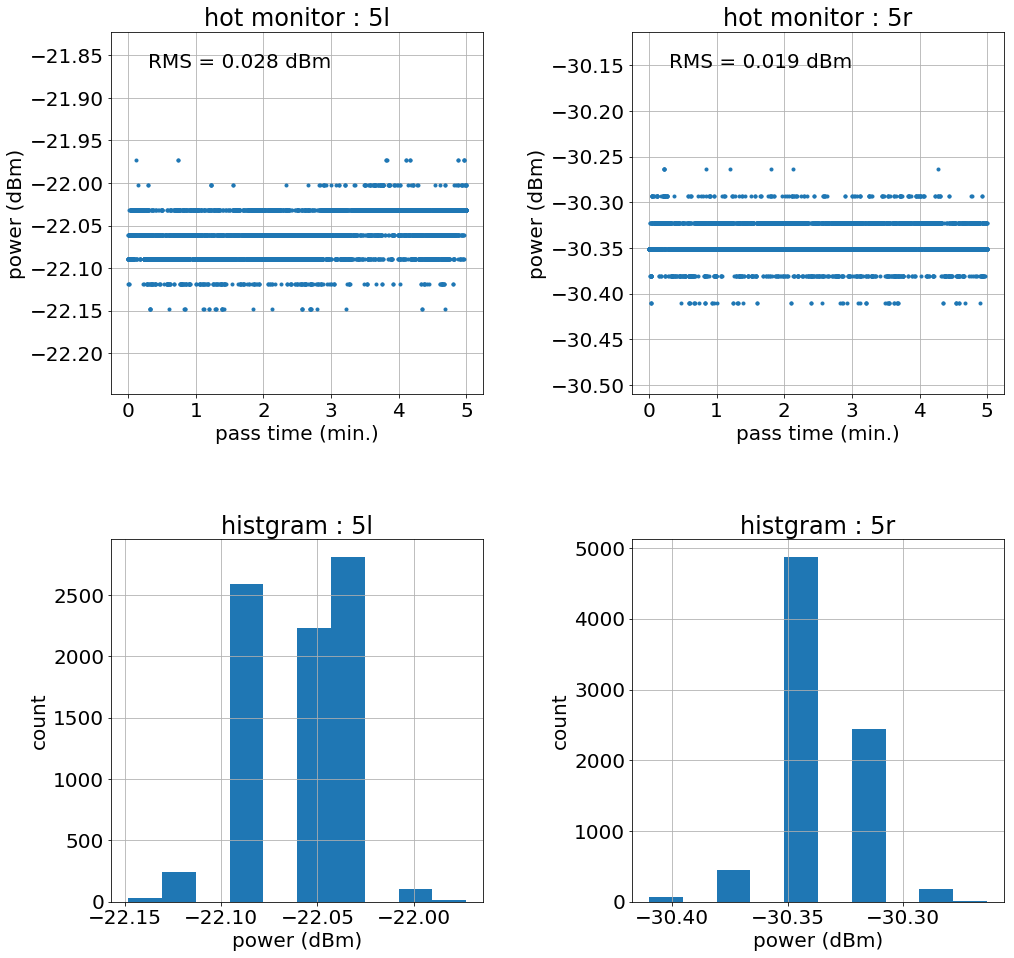

In [86]:
ncol = 2
nrow = 2
nax = ncol * nrow

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _power, _beam in zip(ax, power, beam):
    _ax.plot(pass_time, _power, '.')
    _ax.grid()
    _ax.set_xlabel('pass time (min.)')
    _ax.set_ylabel('power (dBm)')
    _ax.set_ylim(min(_power) - 0.1, max(_power) + 0.15)
    _ax.set_title('hot monitor : {}'.format(_beam))
    _ax.text(0.1, 0.90, 'RMS = {0:.3f} dBm'.format(numpy.std(_power)), transform=_ax.transAxes)

for _ax, _power, _beam in zip(ax[2:], power, beam):
    _ax.hist(_power)
    _ax.grid()
    _ax.set_xlabel('power (dBm)')
    _ax.set_ylabel('count')
    _ax.set_title('histgram : {}'.format(_beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()